In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [3]:
!unzip Luka.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Luka Bakar/42.jpg  
  inflating: Data/Luka Bakar/420.jpg  
  inflating: Data/Luka Bakar/421.jpg  
  inflating: Data/Luka Bakar/422.jpg  
  inflating: Data/Luka Bakar/423.jpg  
  inflating: Data/Luka Bakar/424.jpg  
  inflating: Data/Luka Bakar/425.jpg  
  inflating: Data/Luka Bakar/426.jpg  
  inflating: Data/Luka Bakar/427.jpg  
  inflating: Data/Luka Bakar/428.jpg  
  inflating: Data/Luka Bakar/429.jpg  
  inflating: Data/Luka Bakar/43.jpg  
  inflating: Data/Luka Bakar/430.jpg  
  inflating: Data/Luka Bakar/431.jpg  
  inflating: Data/Luka Bakar/432.jpg  
  inflating: Data/Luka Bakar/433.jpg  
  inflating: Data/Luka Bakar/434.jpg  
  inflating: Data/Luka Bakar/435.jpg  
  inflating: Data/Luka Bakar/436.jpg  
  inflating: Data/Luka Bakar/437.jpg  
  inflating: Data/Luka Bakar/438.jpg  
  inflating: Data/Luka Bakar/439.jpg  
  inflating: Data/Luka Bakar/44.jpg  
  inflating: Data/Luka Bakar/440.jpg  
  inflating: Dat

In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.80 and logs.get('val_accuracy') > 0.80):
      print("\Accuracy telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [5]:
TRAIN_DIR = 'Data'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=.2
)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                        class_mode='categorical',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        shuffle=True,
                                                        subset='validation')

Found 5390 images belonging to 6 classes.
Found 1343 images belonging to 6 classes.


In [7]:
MAP_CHARACTERS = {v:k for k, v in train_generator.class_indices.items()}
tf.keras.backend.clear_session()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(MAP_CHARACTERS), activation='softmax')
])

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [10]:
train_generator.samples

5390

In [11]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    callbacks = [callbacks])

Epoch 1/10
169/169 [==============================] - 422s 2s/step - loss: 1.6695 - accuracy: 0.2796 - val_loss: 1.6719 - val_accuracy: 0.2882
Epoch 2/10
169/169 [==============================] - 414s 2s/step - loss: 1.3151 - accuracy: 0.4698 - val_loss: 1.8578 - val_accuracy: 0.3790
Epoch 3/10
169/169 [==============================] - 415s 2s/step - loss: 1.0705 - accuracy: 0.5909 - val_loss: 1.7477 - val_accuracy: 0.3820
Epoch 4/10
169/169 [==============================] - 415s 2s/step - loss: 0.8930 - accuracy: 0.6670 - val_loss: 1.7004 - val_accuracy: 0.3425
Epoch 5/10
169/169 [==============================] - 415s 2s/step - loss: 0.7736 - accuracy: 0.7135 - val_loss: 1.4182 - val_accuracy: 0.5041
Epoch 6/10
169/169 [==============================] - 413s 2s/step - loss: 0.5984 - accuracy: 0.7861 - val_loss: 1.5694 - val_accuracy: 0.4877
Epoch 7/10
169/169 [==============================] - 411s 2s/step - loss: 0.4955 - accuracy: 0.8219 - val_loss: 1.2867 - val_accuracy: 0.5562

<function matplotlib.pyplot.show(close=None, block=None)>

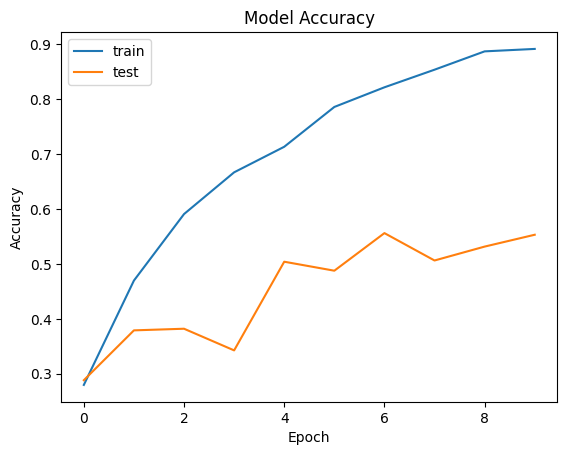

In [12]:
#Plot Akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

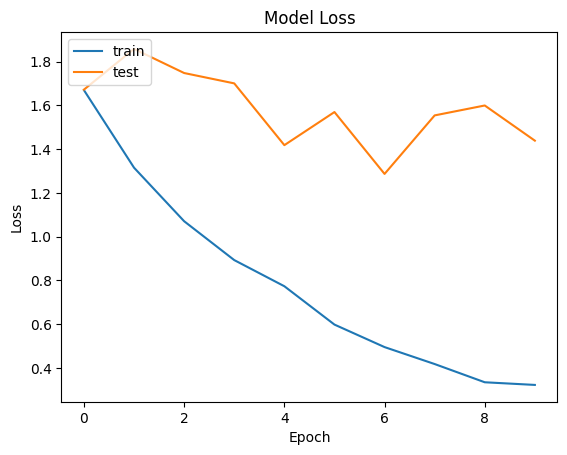

In [13]:
#Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [14]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile
import os

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1




Saved model:
total 280
drwxr-xr-x 2 root root   4096 Jun 15 03:22 assets
-rw-r--r-- 1 root root     55 Jun 15 03:22 fingerprint.pb
-rw-r--r-- 1 root root  24738 Jun 15 03:22 keras_metadata.pb
-rw-r--r-- 1 root root 241792 Jun 15 03:22 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun 15 03:22 variables


In [18]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("/tmp/1") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('wound_tflite.tflite', 'wb') as f:
  f.write(tflite_model)